In [19]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train= pd.read_csv('data/mnist/train.csv')
test = pd.read_csv('data/mnist/test.csv')

In [12]:
X= train.drop('label',axis=1)
y= train['label']

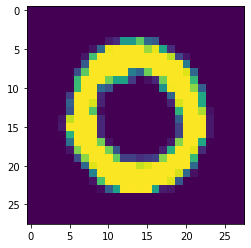

In [24]:
plt.imshow(X.iloc[1].values.reshape(28,28))

In [70]:
from sklearn.model_selection import train_test_split
x= np.squeeze([z.reshape((28,28)) for z in X.values])
train_x,val_x,train_y,val_y= train_test_split(x,y)

In [76]:
train_x[0].shape

(28, 28)

In [100]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(32, kernel_size = 3, activation='relu', input_shape = (28, 28, 1)))
model.add(tf.keras.layers.Conv2D(32, kernel_size = 3, activation='relu'))
model.add(tf.keras.layers.Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(tf.keras.layers.Conv2D(64, kernel_size = 3, activation='relu'))
model.add(tf.keras.layers.Conv2D(64, kernel_size = 3, activation='relu'))
model.add(tf.keras.layers.Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(tf.keras.layers.Conv2D(128, kernel_size = 4, activation='relu'))
model.add(tf.keras.layers.Flatten())
# model.add(Dropout(0.5))
# model.add(Dense(10, activation='softmax'))

In [101]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_68 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 12, 12, 32)        25632     
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_72 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 4, 4, 64)          102464    
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 1, 1, 128)       

In [ ]:


# setting for early stopping

from tensorflow import keras

callbacks = [
    keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor='val_loss',
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=1e-5,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=15,
        verbose=1)
]



In [ ]:
plt.plot(history.history['loss'],label='train_loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.xlabel('No. epoch')
plt.legend()
plt.show()

plt.figure()

plt.plot(history.history['accuracy'],label='train_accuracy')
plt.plot(history.history['val_accuracy'],label='test_accuracy')
plt.xlabel('No. epoch')
plt.legend()
plt.show()

In [ ]:


scores = model.evaluate(x_test, y_test, verbose = 10 )
print ( scores )



predictions=model.predict(test_2d)
pre=predictions.argmax(axis=-1)



submission = pd.Series(pre,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),submission],axis = 1)
submission.to_csv("final_submission_lenet5.csv",index=False)
submission.head()

